### Test the different contributions of a selcted impedance model. 

The files for the different impedance contributions are produced using the interactive scirpts in the following repository: https://gitlab.cern.ch/IRIS/SPS_IW_model/-/tree/master/SPS_IW_model_python

For the computation of the tune, Eq.607 from the following book is used: Eq. 6.207  https://www.slac.stanford.edu/~achao/WileyBook/WileyChapter6.pdf
CGS units are used. 

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [31]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9, 8),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 12,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [32]:
ls

DQ_coherent_Chao_SPS_broadbandResonatorModel.ipynb
DQ_coherent_Chao-SPSQ20-dipoleQuads.ipynb
DQ_coherent_Chao_SPSQ26_dipolarWakesOnly.ipynb
DQ_coherent_Chao-SPSQ26-dipoleQuads.ipynb
DQ_riseTime_Chao.ipynb
DQ_vs_intensity_testContributions.ipynb
impedanceFiles/
Qy_coherent_vs_Intensity_Chao_QpyQpx0.0_steps_26GeV_Q20_2018_complete.pkl
Qy_coherent_vs_Intensity_Chao_QpyQpx0.0_steps_26GeV_Q20_2018_kickerandWall.pkl
Qy_coherent_vs_Intensity_Chao_QpyQpx0.0_steps_26GeV_Q20_2018_kicker.pkl
Qy_coherent_vs_Intensity_Chao_QpyQpx0.0_steps_26GeV_Q20_2018_kicker_wall_BPMs_RFs_EF.pkl
Qy_coherent_vs_Intensity_Chao_QpyQpx0.0_steps_26GeV_Q20_2018_kicker_wall_BPMs_RFs.pkl


In [33]:
name_template = 'Qy_coherent_vs_Intensity_Chao_QpyQpx0.0_steps_26GeV_Q20_2018'

In [82]:
studies = ['complete', 'kicker', 'kickerandWall', 'kicker_wall_BPMs_RFs', 'kicker_wall_BPMs_RFs_EF']
colors = ['r', 'b', 'g', 'k', 'c']

In [83]:
intensity_list = np.linspace(0, 4e11, 25) # protons per bunch

In [84]:
Qy_dict = {}
for study in studies:
    Qy_dict[f'{study}'] = pickle.load(open(f'{name_template}_{study}.pkl', 'rb'))

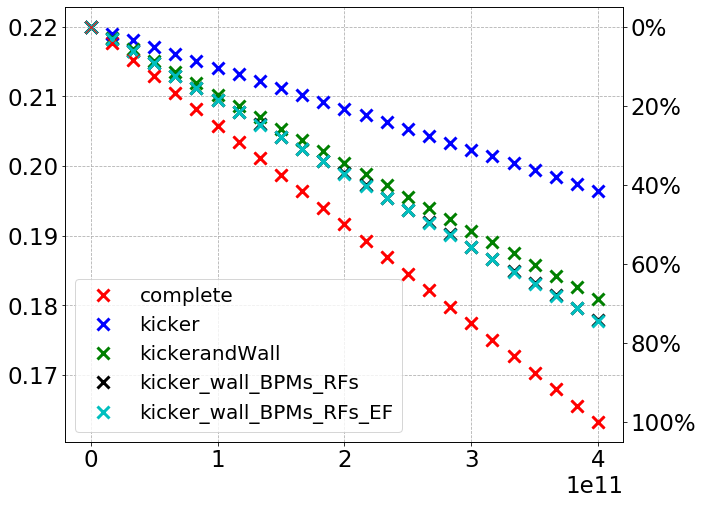

In [93]:
import matplotlib.ticker as mtick

perc = np.linspace(0, 100,len(Qy_dict[f'complete']))


fig, ax1 = plt.subplots(figsize=(10,8))

for i, study in enumerate(studies):
    my_color = colors[i]
    for intensity in intensity_list:
        if intensity == intensity_list[0]:
            my_label=study
        else:
            my_label=''
        ax1.plot(intensity, 0.22+Qy_dict[f'{study}'][f'intensity {intensity}'], 'x', c=my_color, mew=3, label=my_label)
        

ax1.legend()
#ax1.set_ylim(0.16, 0.23)
#ax2.set_ylim(0, 100)

ax2 = ax1.twinx() 
ax2.plot(intensity_list, perc,'x', c='r')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
ax2.invert_yaxis()


ax1.grid(ls='--')

plt.savefig('SPS_Q20_2018_contributions.png')